# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [302]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from plotnine import ggplot, aes, geom_line, geom_abline, labs, theme_minimal

In [303]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [325]:
X = penguins.drop('species', axis = 1)
y = penguins['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,)

In [326]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, drop = "first", handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

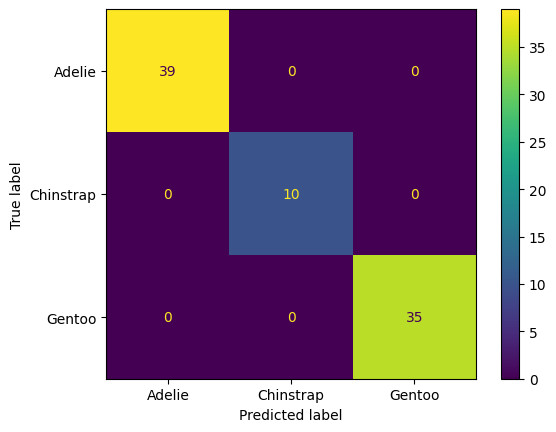

In [327]:
knn1 = Pipeline([
    ("preprocessor", ct),
    ("KNN", KNeighborsClassifier(n_neighbors=3))
])
knn1_fit =knn1.fit(X_train, y_train)
y_pred = knn1_fit.predict(X)
y_pred_test = knn1.predict(X_test)
ConfusionMatrixDisplay.from_estimator(knn1, X_test, y_test)

In [328]:
#Used Chatgpt to reference this code
# Overall Accuracy
accuracy = cross_val_score(knn1, X, y, cv=5, scoring='accuracy').mean()
accuracy

0.9729534147444596

In [329]:
#Used Chatgpt to reference this code
#This code chunks finds precision, Recall, AUC, and F1-score for each species
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.99      0.99        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



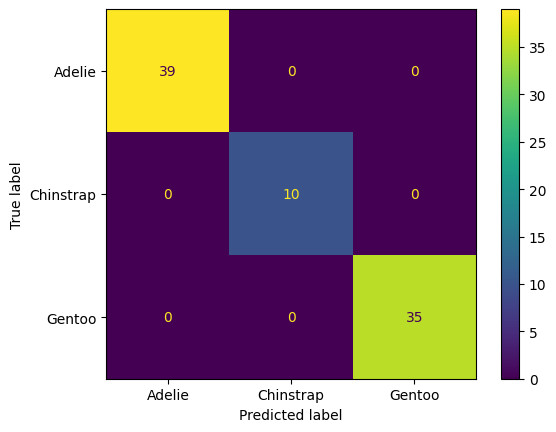

In [330]:
knn2 = Pipeline([
    ("preprocessor", ct),
    ("classifier", KNeighborsClassifier(n_neighbors=7))
])
knn2_fit = knn2.fit(X_train, y_train)
y_pred2 = knn2_fit.predict(X)
y_pred_test2 = knn2.predict(X_test)

ConfusionMatrixDisplay.from_estimator(knn2, X_test, y_test)

In [331]:
# Overall Accuracy
accuracy2 = cross_val_score(knn2, X, y, cv=5, scoring='accuracy').mean()
accuracy2

0.9909995477159657

In [332]:
#This code chunks finds precision, Recall, AUC, and F1-score for each species
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

      Adelie       1.00      0.99      1.00       146
   Chinstrap       0.99      1.00      0.99        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



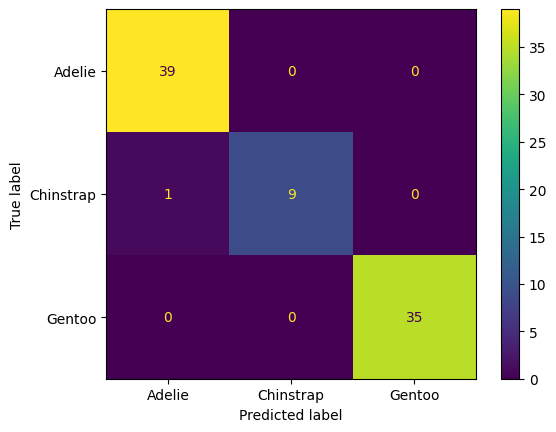

In [333]:
#Used Chatgpt to reference this code
tree1 = Pipeline([
    ("preprocessor", ct),
    ("classifier", DecisionTreeClassifier(max_depth=3))
])
tree1_fit = tree1.fit(X_train, y_train)
y_pred3 = tree1_fit.predict(X)
y_pred_test3 = tree1.predict(X_test)

ConfusionMatrixDisplay.from_estimator(tree1, X_test, y_test)


In [334]:
# Overall Accuracy
accuracy2 = cross_val_score(tree1, X, y, cv=5, scoring='accuracy').mean()
accuracy2

0.9608774310266849

In [335]:
#This code chunks finds precision, Recall, AUC, and F1-score for each species
print(classification_report(y, y_pred3))

              precision    recall  f1-score   support

      Adelie       0.96      0.99      0.98       146
   Chinstrap       0.98      0.93      0.95        68
      Gentoo       1.00      0.99      1.00       119

    accuracy                           0.98       333
   macro avg       0.98      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



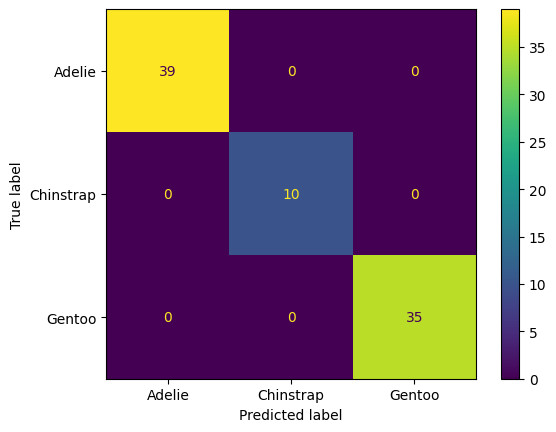

In [348]:
#Used Chatgpt to reference this code
tree2 = Pipeline([
    ("preprocessor", ct),
    ("classifier", DecisionTreeClassifier(max_depth=5))
])
tree2_fit = tree2.fit(X_train, y_train)
y_pred4 = tree2_fit.predict(X)
y_pred_test4 = tree2.predict(X_test)

ConfusionMatrixDisplay.from_estimator(tree2, X_test, y_test)


In [346]:
# Overall Accuracy
accuracy4= cross_val_score(tree2, X, y, cv=5, scoring='accuracy').mean()
accuracy4

0.9789235639981909

In [347]:
#This code chunks finds precision, Recall, AUC, and F1-score for each species
print(classification_report(y, y_pred4))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



Finding ROC and AUC for Gentoo and plotting the ROC

In [339]:
# Find names in the species column
species_names = penguins['species'].unique()
species_names

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [340]:
species = (y=='Gentoo')
#Used Chatgpt to reference this code and explain more in depth on steps
# Step 1: Cross-validation to get predicted probabilities for Gentoo species
model1 = cross_val_predict(knn1, X, species, cv=5, method='predict_proba')[:, 1]
# 'knn1': k-NN model, 'X': features, 'species': target, 'cv=5': 5-fold cross-validation
# '[:, 1]': Get the probability for Gentoo species (index 1)

# Step 2: Compute ROC curve (FPR and TPR)
fpr1, tpr1, thresholds1 = roc_curve(species, model1)
# fpr1: False Positive Rate, tpr1: True Positive Rate

# Step 3: Store ROC data in a DataFrame
roc1 = pd.DataFrame({'model': 'KNN3', 'FPR': fpr1, 'TPR': tpr1})
# Create DataFrame with ROC data for the KNN model

# Step 4: Calculate and print AUC for Gentoo species
print(f"AUC of model 1 for Gentoo is {roc_auc_score(species, model1):.4f}")
# Calculate AUC score to evaluate model's ability to classify Gentoo


AUC of model 1 for Gentoo is 1.0000


In [349]:
model2 = cross_val_predict(knn2, X, species, cv=5, method = 'predict_proba')[:,1]
fpr2, tpr2, thresholds2= roc_curve(species, model2)
roc2 = pd.DataFrame({'model': 'KNN7','FPR': fpr2, 'TPR': tpr2})
print(f"AUC of model 2 for Gentoo is {roc_auc_score(species, model2):.4f}")

AUC of model 2 for Gentoo is 1.0000


In [342]:
model3 = cross_val_predict(tree1, X, species, cv=5, method = 'predict_proba')[:,1]
fpr3, tpr3, thresholds3 = roc_curve(species, model3)
roc3 = pd.DataFrame({'model': 'DecisonTree, depth3','FPR': fpr3, 'TPR': tpr3})
print(f"AUC of model 3 for Gentoo is {roc_auc_score(species, model3):.4f}")

AUC of model 3 for Gentoo is 0.9935


In [343]:
model4 = cross_val_predict(tree2, X, species, cv=5, method = 'predict_proba')[:,1]
fpr4, tpr4, thresholds4 = roc_curve(species, model4)
roc4 = pd.DataFrame({'model': 'DecisonTree, depth5','FPR': fpr4, 'TPR': tpr4})
print(f"AUC of model 4 for Gentoo is {roc_auc_score(species, model4):.4f}")

AUC of model 4 for Gentoo is 0.9935


In [344]:
roc_df = pd.concat([roc1, roc2, roc3, roc4])

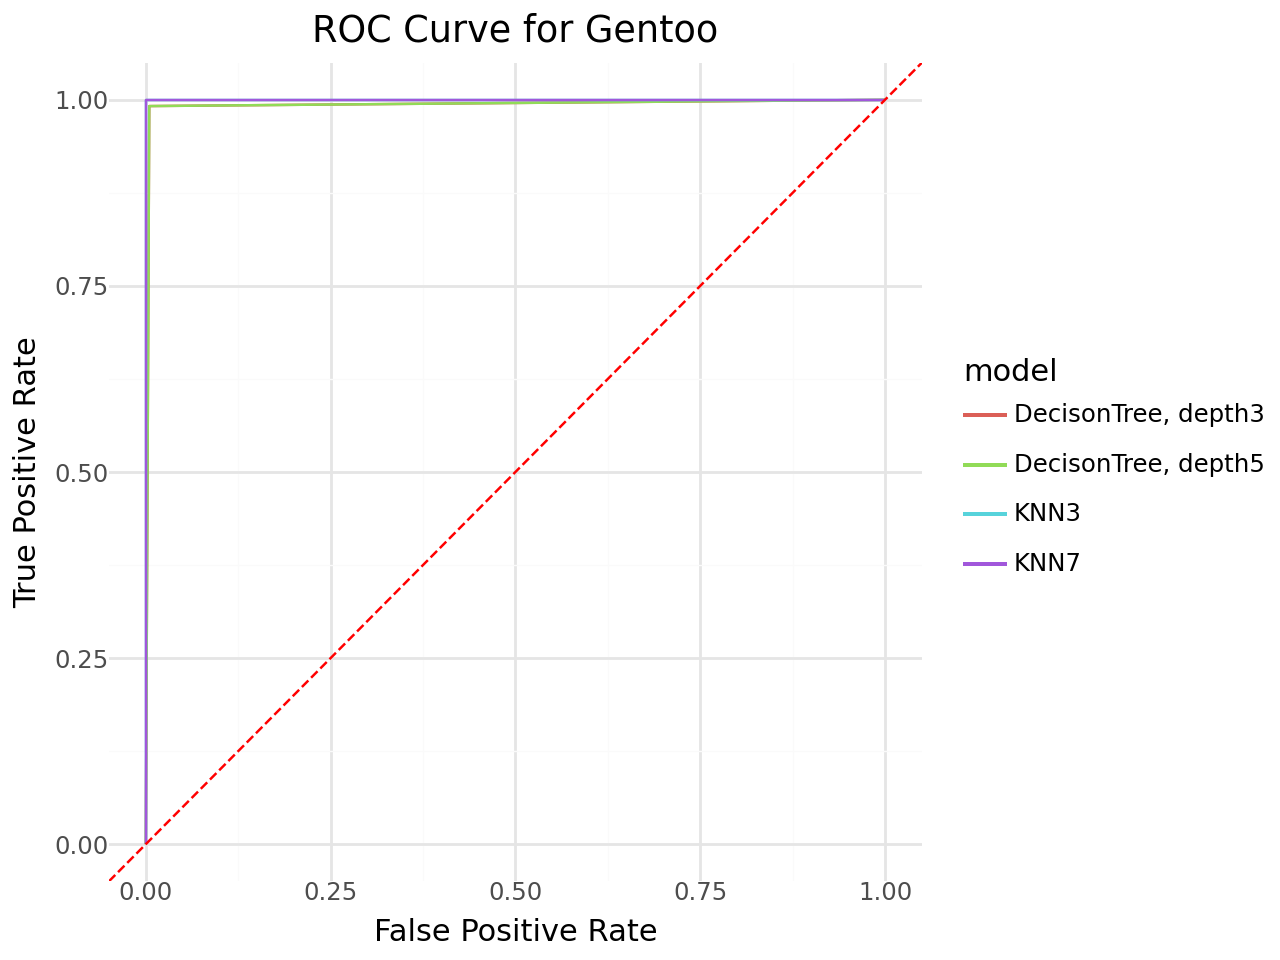

In [345]:
(ggplot(roc_df, aes(x='FPR', y='TPR', color='model'))
    + geom_line()
    + geom_abline(linetype='dashed', color='red')  # Diagonal line for random guess
    + labs(
        title="ROC Curve for Gentoo",
        x="False Positive Rate",
        y="True Positive Rate"
    )
    + theme_minimal()
)
